In [2]:
pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavankalyan1504
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:00<00:00, 1.03GB/s]

In [5]:
import os
with_mask=os.listdir("/content/face-mask-dataset/data/with_mask")

In [6]:
len(with_mask)

3725

In [7]:
without_mask=os.listdir("/content/face-mask-dataset/data/without_mask")

In [8]:
len(without_mask)

3828

In [9]:
with_mask[:5]

['with_mask_3679.jpg',
 'with_mask_1644.jpg',
 'with_mask_817.jpg',
 'with_mask_2221.jpg',
 'with_mask_451.jpg']

In [10]:
import cv2
import numpy as np
data=[]
labels=[]
path="/content/face-mask-dataset/data/with_mask"
for i in with_mask:
  image=os.path.join(path,i)
  image=cv2.imread(image)
  image=cv2.resize(image,(75,75))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=np.array(image)
  data.append(image)
  labels.append(1)



In [11]:
path="/content/face-mask-dataset/data/without_mask"
for i in without_mask:
  img=os.path.join(path,i)
  img=cv2.imread(img)
  img=cv2.resize(img,(75,75))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=np.array(img)
  data.append(img)
  labels.append(0)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

array([[[ 84,  55,  75],
        [ 98,  66,  62],
        [100,  60,  59],
        ...,
        [153, 142, 141],
        [148, 137, 145],
        [152, 139, 162]],

       [[ 91,  56,  62],
        [ 95,  59,  52],
        [100,  63,  54],
        ...,
        [162, 148, 145],
        [146, 132, 130],
        [152, 137, 140]],

       [[ 90,  49,  55],
        [ 93,  53,  56],
        [ 99,  61,  58],
        ...,
        [153, 137, 138],
        [153, 137, 138],
        [157, 142, 139]],

       ...,

       [[ 55,   7,  27],
        [ 96,   2,   9],
        [105,  35,  33],
        ...,
        [  5,   2,  31],
        [  0,  15,  69],
        [ 45, 106, 177]],

       [[148,  88,  77],
        [137,   6,  30],
        [118,   2,  25],
        ...,
        [  0,   2,  52],
        [  8,  27, 111],
        [ 50,  92, 178]],

       [[145,  92,  74],
        [115,  11,  26],
        [111,   8,  27],
        ...,
        [  8,  20,  88],
        [  8,  25, 116],
        [ 13,  30,  91]]], dtype=uint8)
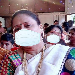

In [14]:
data[1]

In [15]:
import numpy as np

# 'data' is your Python list of images

# Step 1: Convert the list into a NumPy array
data_array = np.array(data)

# Step 2: Pass the NumPy array to the preprocessing function
data_preprocessed = preprocess_input(data_array)

In [16]:
data_preprocessed.shape

(7553, 75, 75, 3)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data_preprocessed,labels,test_size=0.2,random_state=42)

In [18]:
xtrain=np.array(x_train)
ytrain=np.array(y_train)
xtest=np.array(x_test)
ytest=np.array(y_test)

In [19]:
x_test.shape

(1511, 75, 75, 3)

In [20]:
model=InceptionV3(weights="imagenet",include_top=False,input_shape=( 75, 75, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [21]:
cnnblock=model.output

In [22]:
from tensorflow.keras.layers import Flatten,Dense
flatten_block=Flatten()(cnnblock)

In [23]:
ann_block=Dense(256,activation="relu")(flatten_block)

In [24]:
ann_block=Dense(512,activation="relu")(ann_block)

In [25]:
ann_block=Dense(512,activation="relu")(ann_block)
ann_block=Dense(1024,activation="relu")(ann_block)
ann_block=Dense(512,activation="relu")(ann_block)

In [26]:
output_layer=Dense(1,activation="sigmoid")(ann_block)

In [27]:
from tensorflow.keras.models import Model

In [28]:
model1=Model(inputs=model.input,outputs=output_layer)

In [33]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model1.fit(xtrain,ytrain,epochs=3,batch_size=34,validation_data=[xtest,ytest])

Epoch 1/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 167s 450ms/step - accuracy: 0.8332 - loss: 0.3576 - val_accuracy: 0.8213 - val_loss: 0.6740
Epoch 2/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9298 - loss: 0.1773 - val_accuracy: 0.9523 - val_loss: 0.1594
Epoch 3/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9657 - loss: 0.1240 - val_accuracy: 0.9782 - val_loss: 0.1000


In [36]:
model1.evaluate(xtest,ytest)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9827 - loss: 0.0821


[0.10000453889369965, 0.9781601428985596]

In [45]:
img_path="/content/w4.webp"
img=cv2.imread(img_path)
img=cv2.resize(img,(75,75))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=np.array(img)
img_preprocessed = preprocess_input(img)
img_batch = np.expand_dims(img_preprocessed, axis=0)
prediction = model1.predict(img_batch)
if(prediction[0]>=0.5):
  print("Mask Detected")
else:
  print("Mask not detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Mask not detected


In [40]:
img_preprocessed = preprocess_input(img_resized)
img_batch = np.expand_dims(img_preprocessed, axis=0)
prediction = model1.predict(img_batch)

Shape of the image for prediction: (1, 75, 75, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [41]:
prediction

array([[0.9854283]], dtype=float32)